# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
import requests

In [5]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [7]:
image_predictions = pd.read_csv('image-predictions.tsv', '\t')

A:\Anaconda_Setup\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
data = []
with open('tweet-json.txt') as f:
    for line in f:
        data.append(json.loads(line))

In [11]:
tweet_json = pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])

for dic in range(len(data)):
    tweet_id = data[dic]['id']
    retweet_count = data[dic]['retweet_count']
    favorite_count = data[dic]['favorite_count']
    
    dict_result = {'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count}
    tweet_json = tweet_json.append(dict_result, ignore_index=True)

In [12]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [13]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


Check for duolicated tweets:

In [16]:
twitter_archive_enhanced.tweet_id.duplicated().sum()

0

In [17]:
(twitter_archive_enhanced['rating_denominator'] != 10).sum()

23

In [18]:
twitter_archive_enhanced['retweeted_status_id'].notnull().sum()

181

### Quality issues
1. We have 181 retweeted_status_id entries in twitter_archive_enhanced that needs to be excluded from our data

2. change (tweet_id) column in image_predictions and twitter_archive_enhanced to object data type

3. find the source name from the souce column

4. Some records with all-None stages (doggo,floofer,pupper,puppo) can be extracted from the (text) column to find the stage

5. some of the rating_denominator values is not 10 in twitter_archive_enhanced

6. Having missed names in the (name) column

7. remove columns that will not be used for the analysis

8. capitalize the first letter of each word in the p1, p2, p3 columns in the impage_predictions table

### Tidiness issues
1. Information about tweets are spread across three tables
2. make one column for all dog stages and drop the 4 exicting column 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
archive_clean = twitter_archive_enhanced.copy()
image_clean = image_predictions.copy()
json_clean = tweet_json.copy()

### Issue #1:Having 181 retweets that needs to be excluded from the data

#### Define: we need to exclude the retweets from our data by using their rows

#### Code

In [20]:
archive_clean['retweeted_status_id'].notnull().sum()

181

In [21]:
retweet = []
retweet = archive_clean.index[archive_clean['retweeted_status_id'].notnull()].tolist()
for re in retweet:
    archive_clean.drop(index = re, inplace = True)

#### Test

In [22]:
archive_clean['retweeted_status_id'].notnull().sum()

0

### Issue #2:change (tweet_id) column in image_predictions and twitter_archive_enhanced to object data type


#### Define: the tweet_id in both of the mentioned dataframes above should have a data type of object or string because we do not need it to make any calculations and so it would not get corrupted when using on different softwares

#### Code

In [23]:
image_clean.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [24]:
archive_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [25]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('object')

In [26]:
image_clean['tweet_id']  = image_clean['tweet_id'].astype('object')

#### Test

In [27]:
image_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [28]:
archive_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Issue #3: find the source name from the souce column

#### Define:we need to extract the source name from the urls in the source column

#### Code

first I will find what are the sources called

In [29]:
archive_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

they are named iphone, Web Client, Vine, TweetDeck

In [30]:
archive_clean[archive_clean.source.str.contains('iPhone')].source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'],
      dtype=object)

In [31]:
archive_clean[archive_clean.source.str.contains('Web Client')].source.unique()

array(['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'],
      dtype=object)

In [32]:
archive_clean[archive_clean.source.str.contains('Vine')].source.unique()

array(['<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'],
      dtype=object)

In [33]:
archive_clean[archive_clean.source.str.contains('TweetDeck')].source.unique()

array(['<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

lets check if the shown sources represents sll of the records

In [34]:
assert archive_clean.shape[0] == archive_clean[archive_clean.source.str.contains('Web Client')].count()[0] + archive_clean[archive_clean.source.str.contains('Vine')].count()[0] + archive_clean[archive_clean.source.str.contains('TweetDeck')].count()[0] + archive_clean[archive_clean.source.str.contains('iPhone')].count()[0]

In [35]:
archive_clean.reset_index(inplace=True, drop=True)

In [36]:
archive_clean['source_name'] = ''
for i in range(archive_clean.shape[0]):
    try:
        if ('iPhone' in archive_clean.source[i] ):
            archive_clean.source_name[i] = 'iPhone'
        elif ('Vine' in archive_clean.source[i]):
            archive_clean.source_name[i] = 'Vine'
        elif ('TweetDeck' in archive_clean.source[i]):
            archive_clean.source_name[i] = 'TweetDeck'    
        elif ('Web Client' in archive_clean.source[i]):
            archive_clean.source_name[i] = 'Web Client'
    except:
        pass

C:\Users\adel1\AppData\Local\Temp/ipykernel_14056/3484604785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.source_name[i] = 'iPhone'
C:\Users\adel1\AppData\Local\Temp/ipykernel_14056/3484604785.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.source_name[i] = 'Web Client'
C:\Users\adel1\AppData\Local\Temp/ipykernel_14056/3484604785.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.s

#### Test

In [37]:
archive_clean.source_name.unique()

array(['iPhone', 'Web Client', 'Vine', 'TweetDeck'], dtype=object)

In [38]:
archive_clean[archive_clean.source_name == '']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_name


### Issue #4 & #10: Some records with all-None stages (doggo,floofer,pupper,puppo) can be extracted from the (text) column to find the stage,make one column for all dog stages and drop the 4 exicting column

#### Define: I will be trying to extract the stage for dogs with no stage from the column text and then drop the 4 columns specified for the dog stages

#### Code

Here I iterated through the text column looking for a specific word to identify the dog stage

In [39]:
archive_clean['dog_stage'] = 'not specified'
for i in range(archive_clean.shape[0]):
    try: 
        if ((archive_clean.text[i].count('only rate dogs') > 0) | ((archive_clean.text[i].count('not a dog'))>0)) : 
            archive_clean.drop(i)
        
        elif (('pupper' in archive_clean.text.values[i])):
            archive_clean['dog_stage'][i] = 'pupper'
    
        elif (('pup' in archive_clean.text.values[i]) | ('puppo' in archive_clean.text.values[i])):
            archive_clean['dog_stage'][i] = 'puppo'
        
        elif (('doggo' in archive_clean.text.values[i])):
            archive_clean['dog_stage'][i] = 'doggo'
        
        elif (('floofer' in archive_clean.text.values[i])):
            archive_clean['dog_stage'][i] = 'floofer'    
    except:
        continue

C:\Users\adel1\AppData\Local\Temp/ipykernel_14056/4251895568.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['dog_stage'][i] = 'puppo'
C:\Users\adel1\AppData\Local\Temp/ipykernel_14056/4251895568.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['dog_stage'][i] = 'pupper'
C:\Users\adel1\AppData\Local\Temp/ipykernel_14056/4251895568.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['do

In [40]:
archive_clean.drop(['pupper', 'doggo', 'floofer', 'puppo'], axis = 1, inplace = True)

#### Test

In [41]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,source_name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,iPhone,not specified
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,iPhone,puppo
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,iPhone,not specified
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,iPhone,not specified
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,iPhone,not specified


### Issue #5:some of the rating_denominator values is not 10 in twitter_archive_enhanced

#### Define:I will change all of the values in the rating_denominator column to 10

#### Code

In [42]:
archive_clean[archive_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,source_name,dog_stage
263,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,iPhone,not specified
287,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,iPhone,not specified
363,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,iPhone,not specified
429,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,iPhone,not specified
733,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,iPhone,not specified
890,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,iPhone,not specified
942,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,iPhone,doggo
987,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,iPhone,not specified
1024,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,iPhone,not specified
1050,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,iPhone,pupper


In [43]:
archive_clean[archive_clean.rating_denominator != 10].text.values

array(["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
       '@docmisterio account started on 11/15/15',
       'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
       'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
       'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
       'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 h

from the above table I will get the indecies and use them to update the value of the numerator and the denominator

In [44]:
archive_clean['rating_denominator'] = 10
archive_clean.rating_numerator[263] = 13
archive_clean.rating_numerator[890] = 14
archive_clean.rating_numerator[987] = 13
archive_clean.rating_numerator[1024] = 11
archive_clean.rating_numerator[1483] = 10
archive_clean.rating_numerator[2154] = 9

C:\Users\adel1\AppData\Local\Temp/ipykernel_14056/2701706983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.rating_numerator[263] = 13
C:\Users\adel1\AppData\Local\Temp/ipykernel_14056/2701706983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.rating_numerator[890] = 14
C:\Users\adel1\AppData\Local\Temp/ipykernel_14056/2701706983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.rati

#### Test

In [45]:
archive_clean[archive_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,source_name,dog_stage


and lets take one of the above numerator edits to make sure our values have changed as we like

In [46]:
archive_clean.loc[1024]

tweet_id                                                     716439118184652801
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-04-03 01:36:11 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bluebert. He just saw that both #Final...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/716439118...
rating_numerator                                                             11
rating_denominator                                                           10
name                                    


### Issue #6:Having missed names in the (name) column  

#### Define:I will Find the missed names in the (name) column if possible 

#### Code

In [47]:
names = archive_clean.name.unique().tolist() 
missed_names = []
for name in names:
    if ((name[0].islower() == True)):
        missed_names.append(name)
 

In [48]:
for name in missed_names:
    for i in range(archive_clean.shape[0]):
        try:
            named_index = archive_clean.text[i].find('named')
            dot_index = archive_clean.text[i].find('.')
        
            if ((archive_clean.name[i] == name) & (named_index != -1 )):
                print(archive_clean.text[i][named_index+6:dot_index])
                archive_clean.name[i] = archive_clean.text[i][named_index+6:dot_index]   
        except:
            pass

Wylie
Kip
Jacob (Yacōb)
Rufus
Spork
Cherokee
Hemry
Alphred
Alfredo
Leroi
Chuk
Alfonso
Cheryl
Jessiga
Klint
Kohl
Pepe
Octaviath
Johm


C:\Users\adel1\AppData\Local\Temp/ipykernel_14056/1432076667.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean.name[i] = archive_clean.text[i][named_index+6:dot_index]


Berta


#### Test

In [49]:
archive_clean[archive_clean.name == 'Pepe']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,source_name,dog_stage
2123,666983947667116034,NaN,NaN,2015-11-18 14:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a curly Ticonderoga named Pepe. No fee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666983947...,11,10,Pepe,iPhone,not specified


### Issue #7:remove columns that will not be used for the analysis

#### Define:Here I will remove columns that will not be used for analysis so the reading of the data will be easier

#### Code

In [50]:
archive_clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'text'], axis=1,inplace=True)

#### Test

In [51]:
archive_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,source_name,dog_stage
0,892420643555336193,13,10,Phineas,iPhone,not specified
1,892177421306343426,13,10,Tilly,iPhone,puppo
2,891815181378084864,12,10,Archie,iPhone,not specified
3,891689557279858688,13,10,Darla,iPhone,not specified
4,891327558926688256,12,10,Franklin,iPhone,not specified


### Issue #8:the first letter of each word in the p1, p2, p3 columns in the impage_predictions table should be in uppercase

#### Define:capitalize the first letter of each word in the p1, p2, p3 columns in the impage_predictions table and also we should remove the '_' from the names

#### Code

In [52]:
image_clean['p1'] = image_clean['p1'].str.replace('_', ' ')
image_clean['p2'] = image_clean['p2'].str.replace('_', ' ')
image_clean['p3'] = image_clean['p3'].str.replace('_', ' ')

In [53]:
image_clean['p1'] = image_clean['p1'].str.title()
image_clean['p2'] = image_clean['p2'].str.title()
image_clean['p3'] = image_clean['p3'].str.title()

#### Test

In [54]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #9:Information about tweets are spread across three tables

#### Define: I will merge these three DataFrames together becaus each ibservational unit (Tweets) should have one table

#### Code

In [60]:
big_data = pd.merge(archive_clean, json_clean, left_on='tweet_id', right_on='tweet_id', how='left')

In [61]:
big_data = pd.merge(big_data,image_clean, left_on='tweet_id',right_on='tweet_id',how='left')

In [62]:
big_data.head()

,tweet_id,rating_numerator,rating_denominator,name,source_name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,13,10,Phineas,iPhone,not specified,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,13,10,Tilly,iPhone,puppo,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,12,10,Archie,iPhone,not specified,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,13,10,Darla,iPhone,not specified,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,12,10,Franklin,iPhone,not specified,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [63]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   object 
 1   rating_numerator    2175 non-null   int64  
 2   rating_denominator  2175 non-null   int64  
 3   name                2175 non-null   object 
 4   source_name         2175 non-null   object 
 5   dog_stage           2175 non-null   object 
 6   retweet_count       2175 non-null   object 
 7   favorite_count      2175 non-null   object 
 8   jpg_url             1994 non-null   object 
 9   img_num             1994 non-null   float64
 10  p1                  1994 non-null   object 
 11  p1_conf             1994 non-null   float64
 12  p1_dog              1994 non-null   object 
 13  p2                  1994 non-null   object 
 14  p2_conf             1994 non-null   float64
 15  p2_dog              1994 non-null   object 
 16  p3    

as we can see we have some missing data form the image dataframe, since there is no way to my knowledge to get this missing data I will drop them

In [64]:
big_data.dropna(inplace = True)

#### Test

In [65]:
big_data.head()

,tweet_id,rating_numerator,rating_denominator,name,source_name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,13,10,Phineas,iPhone,not specified,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,13,10,Tilly,iPhone,puppo,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,12,10,Archie,iPhone,not specified,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,13,10,Darla,iPhone,not specified,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,12,10,Franklin,iPhone,not specified,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [66]:
big_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   object 
 1   rating_numerator    1994 non-null   int64  
 2   rating_denominator  1994 non-null   int64  
 3   name                1994 non-null   object 
 4   source_name         1994 non-null   object 
 5   dog_stage           1994 non-null   object 
 6   retweet_count       1994 non-null   object 
 7   favorite_count      1994 non-null   object 
 8   jpg_url             1994 non-null   object 
 9   img_num             1994 non-null   float64
 10  p1                  1994 non-null   object 
 11  p1_conf             1994 non-null   float64
 12  p1_dog              1994 non-null   object 
 13  p2                  1994 non-null   object 
 14  p2_conf             1994 non-null   float64
 15  p2_dog              1994 non-null   object 
 16  p3    

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
big_data.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [4]:
big_data = pd.read_csv('twitter_archive_master.csv')

In [8]:
big_data.head()

,tweet_id,rating_numerator,rating_denominator,name,source_name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,13,10,Phineas,iPhone,not specified,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,13,10,Tilly,iPhone,puppo,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,12,10,Archie,iPhone,not specified,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,13,10,Darla,iPhone,not specified,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,12,10,Franklin,iPhone,not specified,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


In [7]:
big_data.drop(['Unnamed: 0'],axis = 1, inplace = True)

## what is the highest rating a dog have?

In [70]:
print('the highest rated dog ahs a rating of: ', (big_data['rating_numerator']).max()/10)

the highest rated dog ahs a rating of:  177.6


## what Stage has the highest average rating?

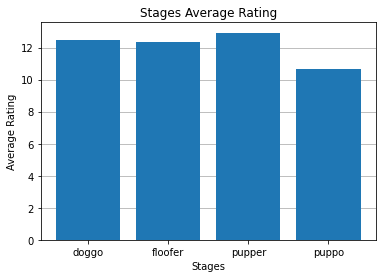

In [71]:
import matplotlib.pyplot as plt

dog_stage = big_data.groupby('dog_stage')
avg_dog_rate = dog_stage.rating_numerator.mean().tolist()[1:]
stages =['doggo','floofer','pupper','puppo']

plt.bar(stages,avg_dog_rate, zorder=2)
plt.title('Stages Average Rating')
plt.xlabel('Stages')
plt.ylabel('Average Rating')
plt.grid(axis='y', zorder=0);


as we can see pupper stage has the highest average rating

## what source is used the most?

{'iPhone': 1955, 'Web Client': 28, 'TweetDeck': 11}


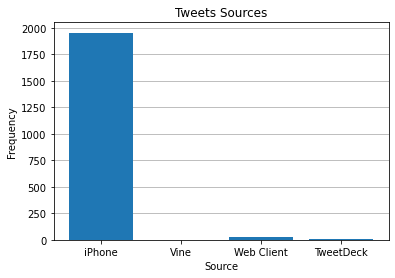

In [72]:
freq_arr = np.array([(big_data['source_name'] == 'iPhone').sum(),(big_data['source_name'] == 'Vine').sum(),(big_data['source_name'] == 'Web Client').sum(),(big_data['source_name'] == 'TweetDeck').sum()])
sources = ['iPhone','Vine','Web Client','TweetDeck']
plt.bar(sources,freq_arr, zorder=2);
plt.title('Tweets Sources')
plt.xlabel('Source')
plt.ylabel('Frequency')
plt.grid(axis='y', zorder=0);

print(dict(big_data.source_name.value_counts()))

the most used source is IPhone

## what is the most common dog rating?

In [73]:
from collections import Counter
x = big_data['rating_numerator']
count = Counter(x)
count.most_common()

[(12, 450),
 (10, 420),
 (11, 397),
 (13, 262),
 (9, 151),
 (8, 95),
 (7, 51),
 (14, 36),
 (5, 33),
 (6, 32),
 (3, 19),
 (4, 15),
 (2, 9),
 (1, 4),
 (0, 2),
 (84, 1),
 (24, 1),
 (75, 1),
 (27, 1),
 (165, 1),
 (1776, 1),
 (204, 1),
 (99, 1),
 (80, 1),
 (45, 1),
 (60, 1),
 (44, 1),
 (143, 1),
 (121, 1),
 (26, 1),
 (144, 1),
 (88, 1),
 (420, 1)]

the mos common dog rating is 12/10

In [74]:
big_data.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1994.000000,1.994000e+03,1994.000000,1994.0,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,1103.935807,7.358508e+17,12.273821,10.0,2766.753260,8895.725677,1.203109,0.593941,1.344195e-01,6.024848e-02
std,633.846734,6.747816e+16,41.487825,0.0,4674.698447,12213.193181,0.560777,0.271954,1.006807e-01,5.089067e-02
min,0.000000,6.660209e+17,0.000000,10.0,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,553.250000,6.758475e+17,10.000000,10.0,624.750000,1982.000000,1.000000,0.362857,5.393987e-02,1.619283e-02
50%,1105.500000,7.084748e+17,11.000000,10.0,1359.500000,4136.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,1665.500000,7.877873e+17,12.000000,10.0,3220.000000,11308.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,2174.000000,8.924206e+17,1776.000000,10.0,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01
